In [2]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
gpus = tf.config.experimental.list_physical_devices("GPU")
print(gpus)
import numpy as np
import math
import pandas
from matplotlib import pyplot as plt
from PIL import Image
import os


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Решил отдельно натренировать модель для трансформации результата в более четкий.

In [4]:
up_above = os.path.dirname(os.getcwd()) # Чуть более сложно чем хотелось бы.
locloc = up_above + "\\BigDataCubes\\CombinedDatasets\\" 
namename = "Part0"
all_photos = np.load(locloc + namename + 'Photos.npy')
all_normals = np.load(locloc + namename + 'Normals.npy')
all_masks = np.load(locloc + namename + 'Masks.npy')

In [5]:

myModel =   tf.keras.models.load_model(up_above + "\\TrainedModels/blurry_normals_300.keras")

In [6]:
input = all_photos[0].reshape((1,64,64,3))

In [7]:
normals = myModel.predict(all_photos)

107/107 [==============================] - 7s 8ms/step


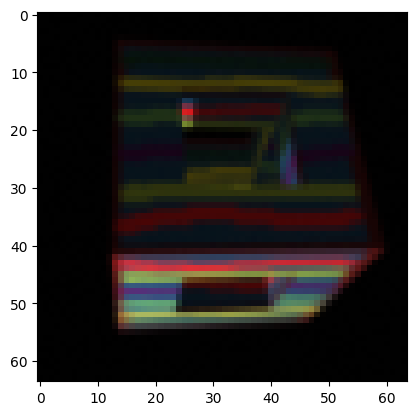

In [8]:
plt.imshow( all_photos[1].astype(np.float32))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.13001077..1.0103614].


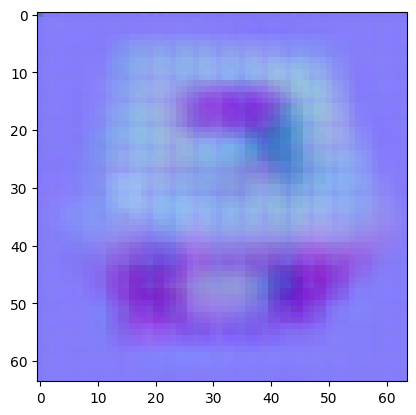

In [9]:
plt.imshow(normals[1])

In [10]:
np.save("blurry_predictions.npy", normals)

In [11]:
# Решил что не буду торопиться с этим. Сначала попробую натренировать модель что выдает четкий результат. 

In [12]:
del all_photos; del all_normals; del all_masks; del normals;

In [13]:
up_above = os.path.dirname(os.getcwd()) # Чуть более сложно чем хотелось бы.
locloc = up_above + "\\BigDataCubes\\CombinedDatasets\\" 
namename = "Part1"
all_photos = np.load(locloc + namename + 'Photos.npy')
all_normals = np.load(locloc + namename + 'Normals.npy')
all_masks = np.load(locloc + namename + 'Masks.npy')

In [17]:
up_above = os.path.dirname(os.getcwd())
myModel =   tf.keras.models.load_model(up_above + "\\TrainedModels/blurry_normals_300.keras")

1/1 [==============================] - 0s 234ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.003921509..1.0368868].


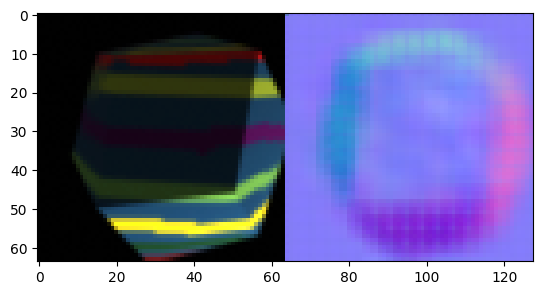

In [18]:
test_index = 60
photo = all_photos[test_index].reshape((1,64,64,3))
normals = myModel.predict(photo)[0]
plt.imshow(np.concatenate([photo[0], normals], axis = 1).astype("float32"))

In [19]:
normals = myModel.predict(all_photos)

107/107 [==============================] - 1s 6ms/step


In [20]:
np.save("test_blurry_predictions.npy", normals)